In [1]:
import numpy as np
from biopandas.pdb import PandasPdb
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Эту ячейку иногда надо запускать несколько раз 
ppdb1 = PandasPdb().fetch_pdb('1K6F')
data1 = ppdb1.df['ATOM']
data1.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,PRO,,A,1,,...,9.225,23.976,174.522,1.0,32.27,,,N,NaN,346
1,ATOM,2,,CA,,PRO,,A,1,,...,8.230,23.902,173.411,1.0,32.77,,,C,NaN,348
2,ATOM,3,,C,,PRO,,A,1,,...,8.827,23.261,172.170,1.0,30.28,,,C,NaN,350
3,ATOM,4,,O,,PRO,,A,1,,...,10.041,22.969,172.133,1.0,24.03,,,O,NaN,352
4,ATOM,5,,CB,,PRO,,A,1,,...,7.931,25.388,173.207,1.0,33.92,,,C,NaN,354


In [3]:
#Эту ячейку иногда надо запускать несколько раз 
ppdb2 = PandasPdb().fetch_pdb('3IX3')
data2 = ppdb2.df['ATOM']
data2.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,PHE,,A,7,,...,17.619,1.189,-0.436,1.0,36.87,,,N,NaN,395
1,ATOM,2,,CA,,PHE,,A,7,,...,17.943,2.609,-0.117,1.0,37.40,,,C,NaN,397
2,ATOM,3,,C,,PHE,,A,7,,...,17.721,3.498,-1.315,1.0,37.49,,,C,NaN,399
3,ATOM,4,,O,,PHE,,A,7,,...,17.211,4.615,-1.185,1.0,37.39,,,O,NaN,401
4,ATOM,5,,CB,,PHE,,A,7,,...,19.395,2.750,0.321,1.0,37.45,,,C,NaN,403


In [4]:
#Эту ячейку иногда надо запускать несколько раз 
ppdb3 = PandasPdb().fetch_pdb('6EC0')
data3 = ppdb3.df['ATOM']
data3.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,A,225,,...,59.127,-11.952,73.223,1.0,137.92,,,N,NaN,568
1,ATOM,2,,CA,,MET,,A,225,,...,58.241,-13.046,72.843,1.0,152.71,,,C,NaN,570
2,ATOM,3,,C,,MET,,A,225,,...,58.880,-13.878,71.723,1.0,110.61,,,C,NaN,572
3,ATOM,4,,O,,MET,,A,225,,...,60.089,-13.789,71.517,1.0,113.30,,,O,NaN,574
4,ATOM,5,,CB,,MET,,A,225,,...,56.876,-12.489,72.433,1.0,89.89,,,C,NaN,576


In [5]:
def plane_proj(vector, normal):
    vector = np.array(vector, dtype='float64')
    normal = np.array(normal, dtype='float64')
    
    v = np.cross(vector, normal)
    w = np.cross(normal, v)
    len_w = np.sqrt(w @ w.T)
    w_norm = w / len_w
    return w_norm * (vector @ w_norm.T) 


def get_angle(a, b, c, d):
    a = np.array(a, dtype='float64')
    b = np.array(b, dtype='float64')
    c = np.array(c, dtype='float64')
    d = np.array(d, dtype='float64')
    
    normal = c - b
    v = a - b
    w = d - b
    
    normal /= np.sqrt(normal @ normal.T)

    
    p_v = plane_proj(v, normal)
    p_w = plane_proj(w, normal)
    
    cos = (p_v @ p_w.T) / np.sqrt(p_v @ p_v.T) / np.sqrt(p_w @ p_w.T)
    
    return np.arccos(cos)

In [6]:
def get_coord(row):
    return np.array([row['x_coord'], row['y_coord'], row['z_coord']])

In [7]:
def get_angles(data):
    angles = pd.DataFrame(columns=['phi', 'psy'])
    for ch in data['chain_id'].unique():
        chain = data[data['chain_id'] == ch]
        resid_num = max(chain['residue_number'])
        for i in range(1, resid_num - 1):
            resid_0 = chain[chain['residue_number'] == i]
            resid_1 = chain[chain['residue_number'] == i + 1]
            resid_2 = chain[chain['residue_number'] == i + 2]
            
            atoms = [
                resid_0[resid_0['atom_name'] == 'CB'],
                resid_1[resid_1['atom_name'] == 'N'],
                resid_1[resid_1['atom_name'] == 'CA'],
                resid_1[resid_1['atom_name'] == 'CB'],
                resid_2[resid_2['atom_name'] == 'N']
            ]
        
            if any(x.empty for x in atoms):
                continue
        
            atoms = [a.iloc[0] for a in atoms]
            
            coords = [get_coord(a) for a in atoms]
        
            phi = get_angle(*coords[:-1])
            psy = get_angle(*coords[1:])

            angles.loc[len(angles)] = [phi, psy]
        
    return angles
        

In [8]:
angles1 = get_angles(data1)
angles2 = get_angles(data2)
angles3 = get_angles(data3)

In [9]:
def draw_lines():
    plt.plot([0, np.pi], [np.pi / 2, np.pi / 2], color='gray')
    plt.plot([np.pi / 2, np.pi / 2], [0, np.pi], color='gray')

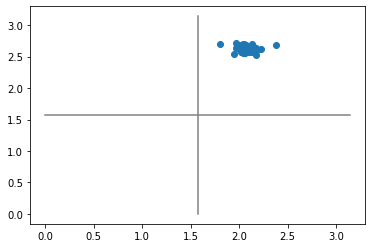

In [10]:
draw_lines()
plt.scatter(angles1['phi'], angles1['psy']);

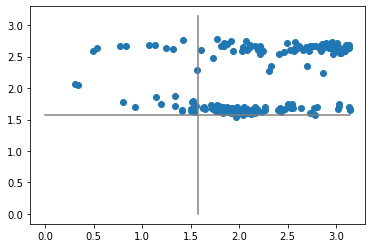

In [11]:
draw_lines()
plt.scatter(angles2['phi'], angles2['psy']);

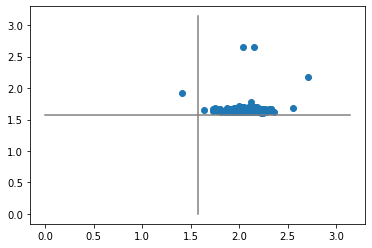

In [12]:
draw_lines()
plt.scatter(angles3['phi'], angles3['psy']);